# About Notebook

In this notebook, I use dataset from `kaggle`, here is the link of dataset "https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set/". I select this dataset because mostly columns are not distributed normally, so we will see after applying `Power Transformer` we can check results before and after data.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats #for Q-Q Plot to check data distribution

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer  #for improving the distribution of data 

In [96]:
df = pd.read_csv("Datasets/concrete_data.csv")

In [97]:
df.head(3)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [98]:
df.rename(columns={"blast_furnace_slag":"blast_slag", "coarse_aggregate":"coarse_agg", "fine_aggregate":"fine_agg", "concrete_compressive_strength":"strength"}, inplace=True)

In [99]:
df.head(3)

,cement,blast_slag,fly_ash,water,superplasticizer,coarse_agg,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [100]:
df.shape

(1030, 9)

In [101]:
df.isnull().sum()

cement              0
blast_slag          0
fly_ash             0
water               0
superplasticizer    0
coarse_agg          0
fine_aggregate      0
age                 0
strength            0
dtype: int64

#### There is no -ve value in dataset, if it is then it was difficult to apply box-cox transformation but here is "0" value which is also effect box-cox transformer because according to box-cox transformer, values should be greater than "0". But Yeo-Johnson can handle both +ve and -ve values

In [102]:
df.describe()

,cement,blast_slag,fly_ash,water,superplasticizer,coarse_agg,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [103]:
x = df.drop(columns=["strength"])
y = df["strength"]

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state=100)

## Accuracy before applying Power Transformer

In [106]:
lr = LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.6225200877404842


In [107]:
lrr = LinearRegression()
np.mean(cross_val_score(lrr, x, y, scoring="r2"))

0.4609940491662864

## Visualization : Before power transformer

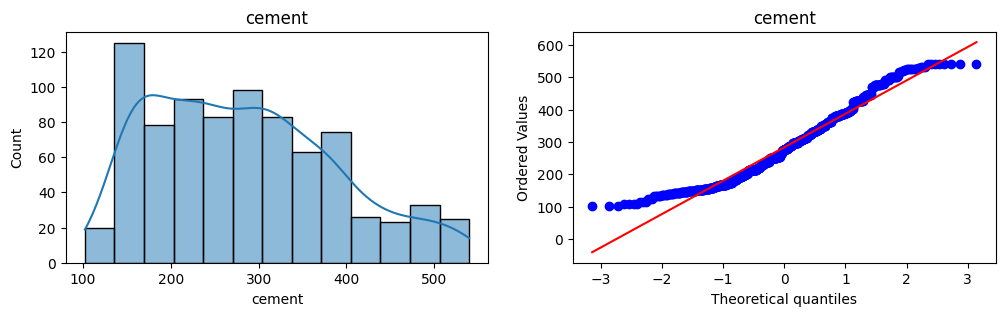

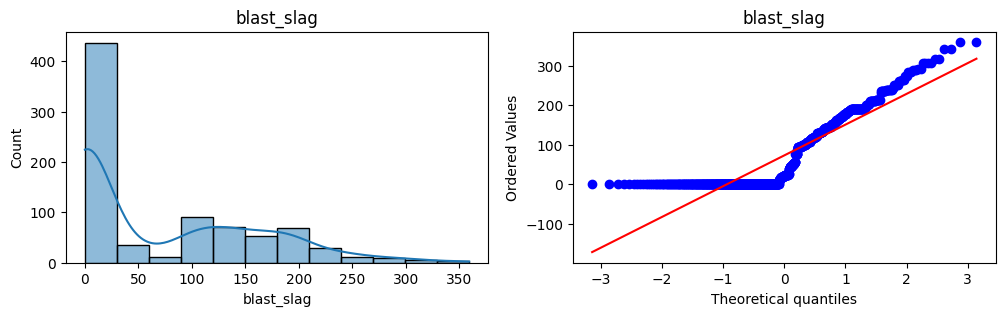

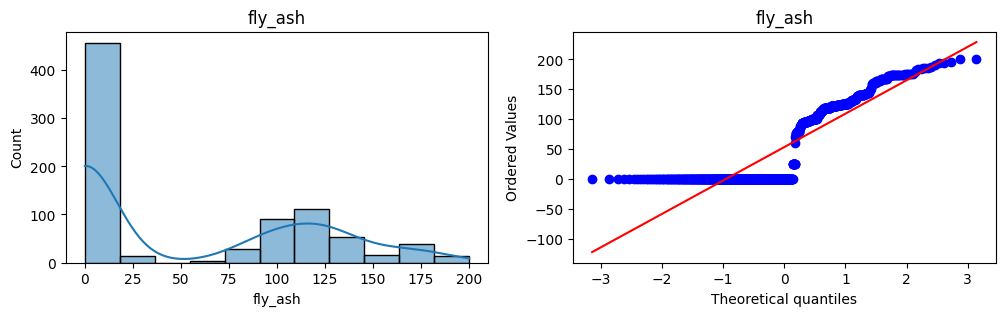

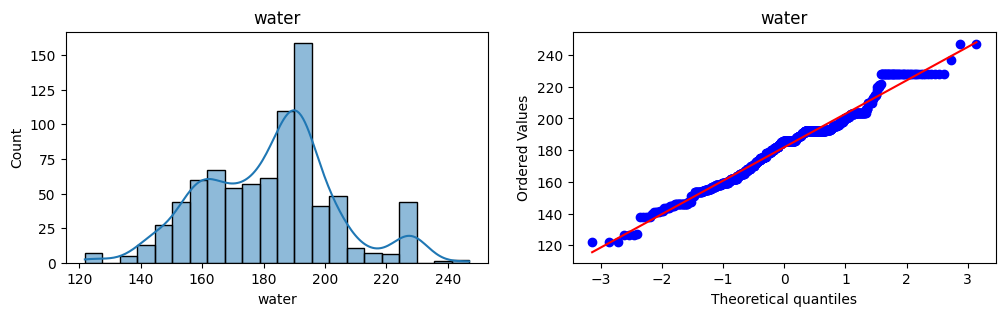

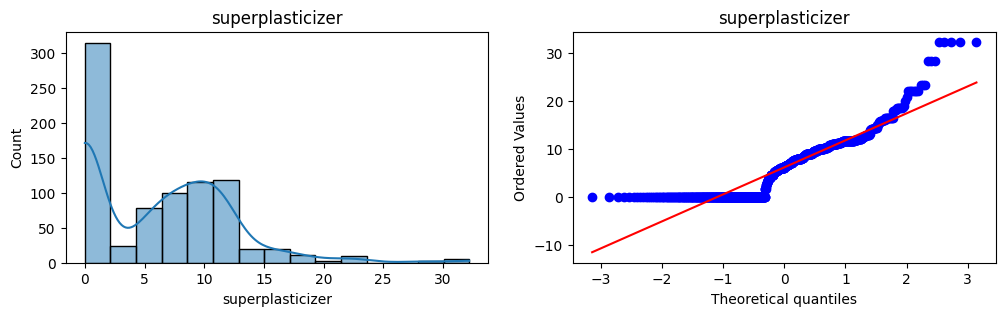

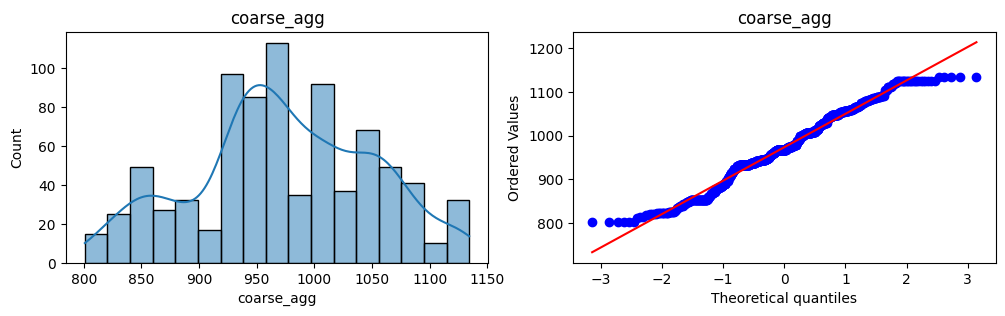

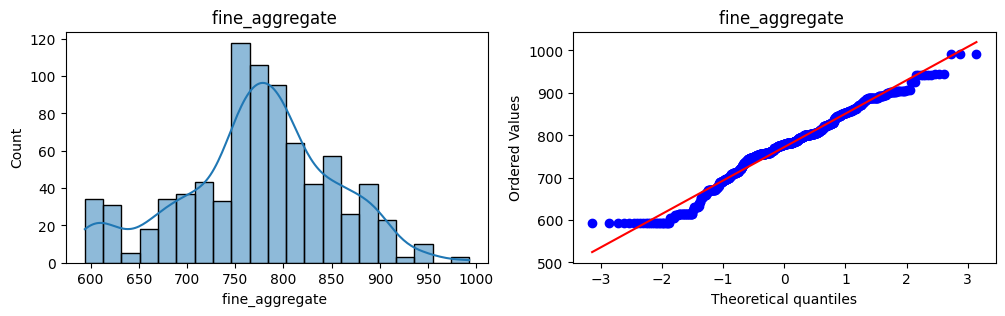

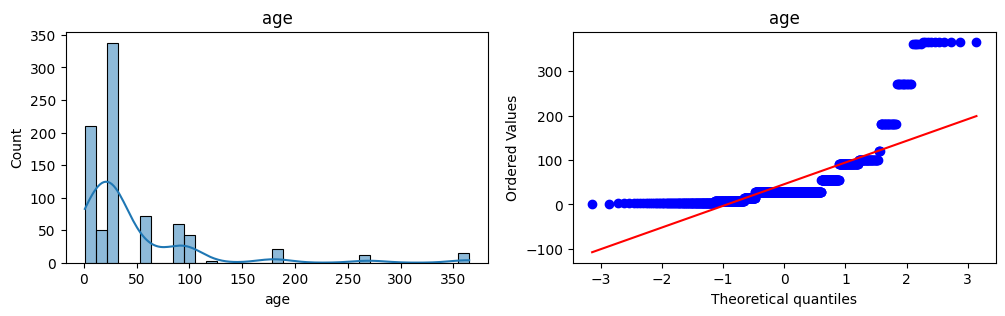

In [108]:
for col in x_train.columns:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,3))

    sns.histplot(x_train[col], kde=True, ax=ax1)
    ax1.set_title(col)
    
    stats.probplot(x_train[col], dist="norm", plot=ax2)
    ax2.set_title(col)
    
    plt.show()

In [109]:
for i in x_train.columns:
    print(i)

cement
blast_slag
fly_ash
water
superplasticizer
coarse_agg
fine_aggregate 
age


## Accuracy of Power Transformer (Box-Cox)

In [110]:
pt = PowerTransformer(method="box-cox")

x_train_transformed = pt.fit_transform(x_train+0.000001)
x_test_transformed = pt.transform(x_test+0.000001)

pd.DataFrame({"cols":x_train.columns, "lambda":pt.lambdas_})

,cols,lambda
0,cement,0.190239
1,blast_slag,0.020514
2,fly_ash,-0.035777
3,water,0.738637
4,superplasticizer,0.092961
5,coarse_agg,1.343532
6,fine_aggregate,1.929702
7,age,0.045928


In [111]:
x_train_transformed

array([[ 0.06824371, -1.07014125,  1.12090052, ...,  1.04393295,
         0.02074435,  0.70939405],
       [ 1.84517177, -1.07014125, -0.8959717 , ..., -2.18204691,
         0.33950028,  0.11058717],
       [ 1.0497357 , -1.07014125, -0.8959717 , ..., -0.44419564,
        -0.22638248,  1.13040554],
       ...,
       [-0.58993073, -1.07014125,  1.14825657, ...,  1.02657756,
        -0.00487049, -0.46945713],
       [ 1.93300342, -1.07014125, -0.8959717 , ..., -1.55430956,
         1.61391554, -1.69429423],
       [ 0.7155731 , -1.07014125, -0.8959717 , ...,  0.95589723,
         0.39241467,  2.41443152]])

In [113]:
# converting it into dataframes
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)
x_test_transformed = pd.DataFrame(x_test_transformed, columns=x_test.columns)

In [114]:
lr = LinearRegression()

lr.fit(x_train_transformed, y_train)

y_pred = lr.predict(x_test_transformed)

print(r2_score(y_test,y_pred))

0.7929222903644306


In [115]:
pt = PowerTransformer(method="box-cox")
x_transformed = pt.fit_transform(x+0.000001)

lr = LinearRegression()
np.mean(cross_val_score(lr, x_transformed, y, scoring="r2"))

0.6662950327869239

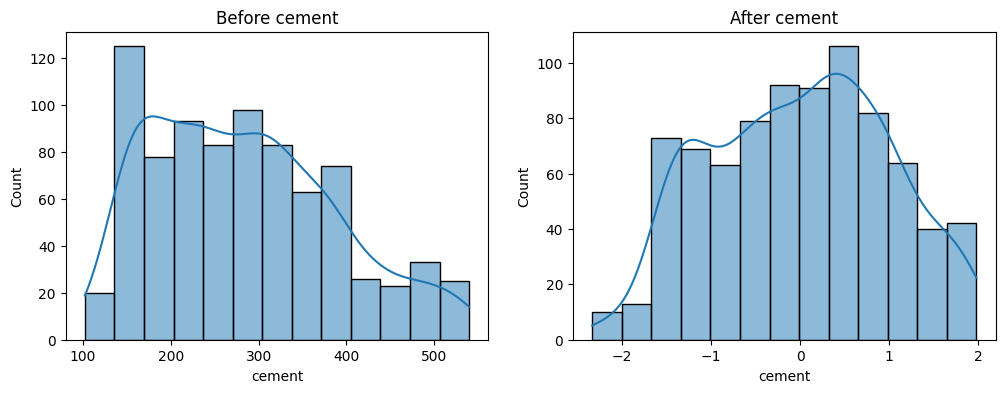

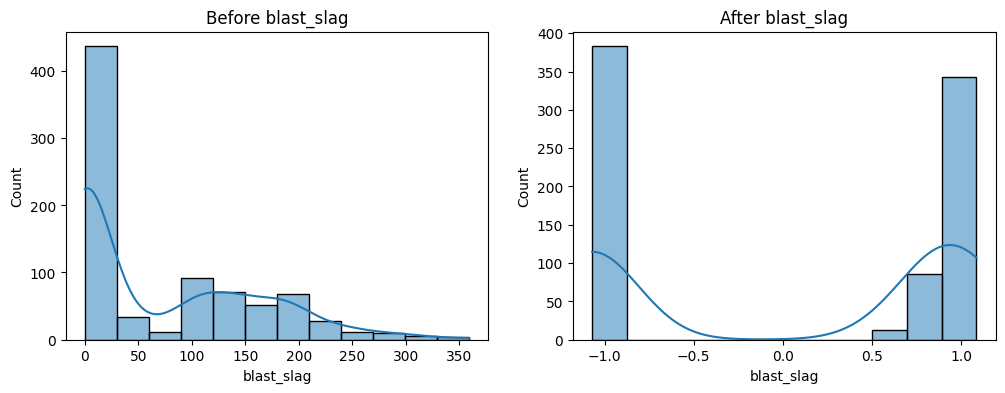

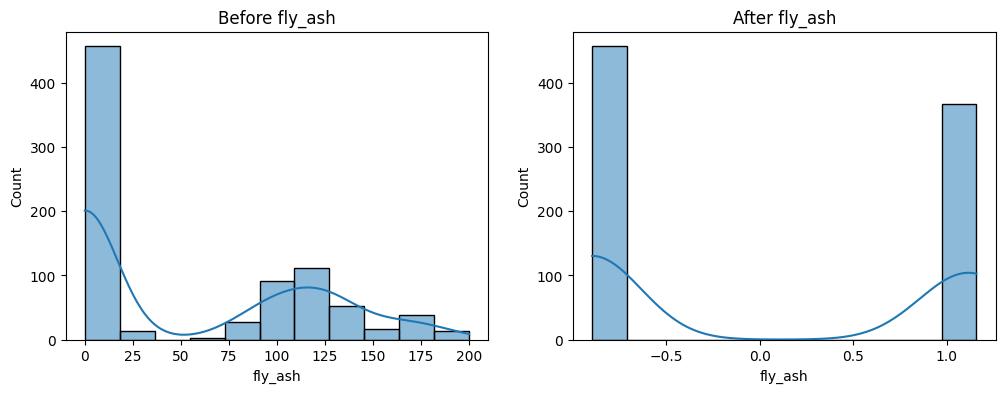

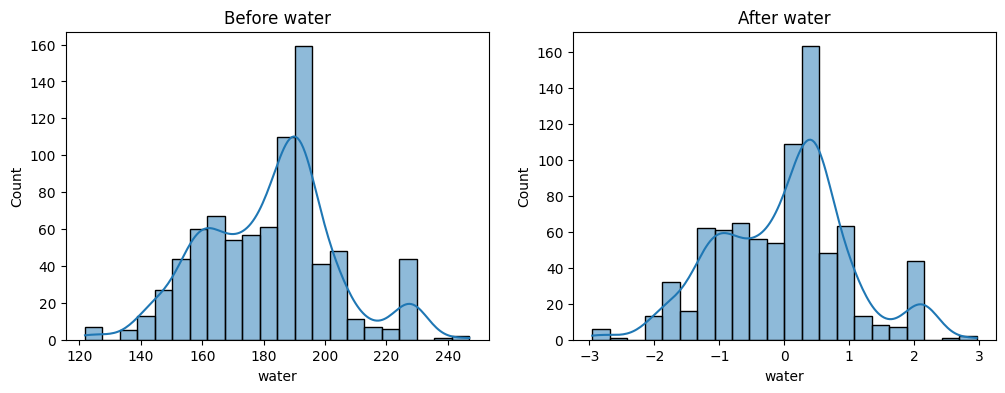

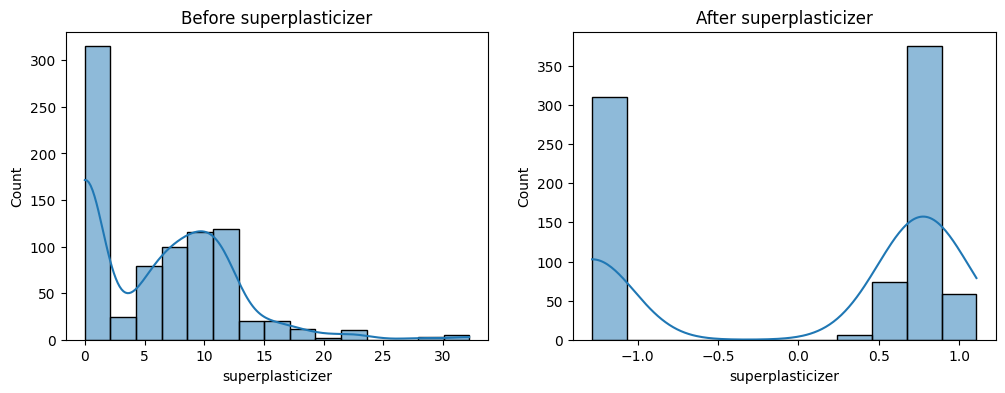

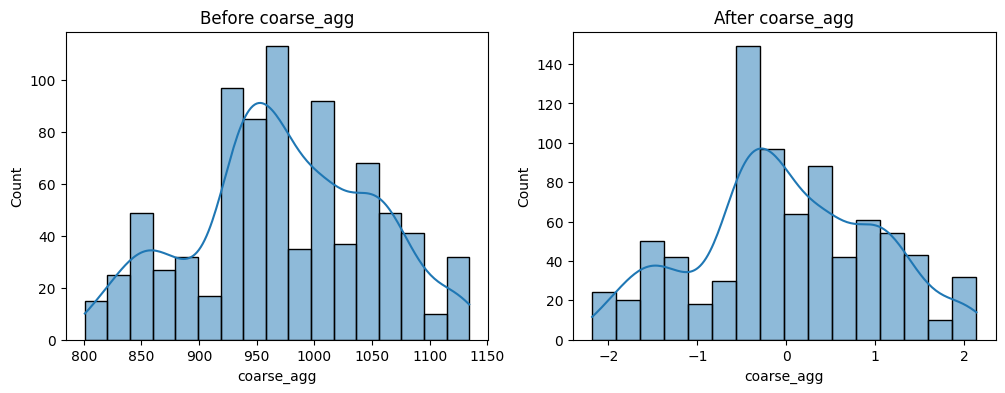

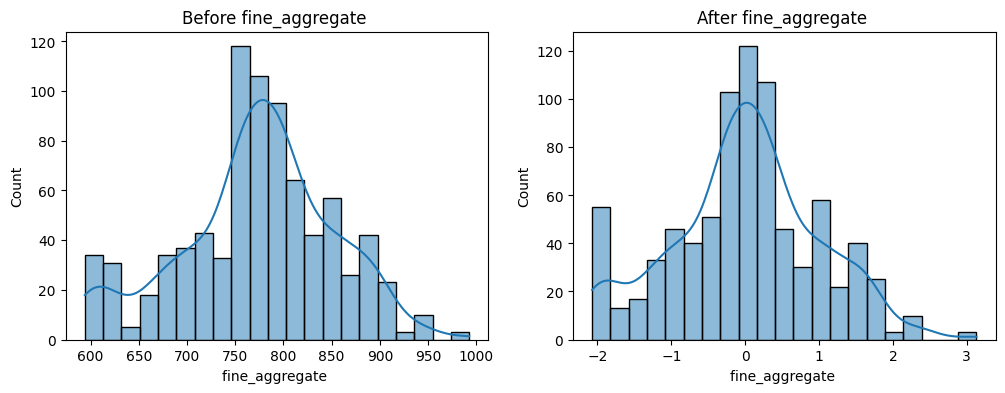

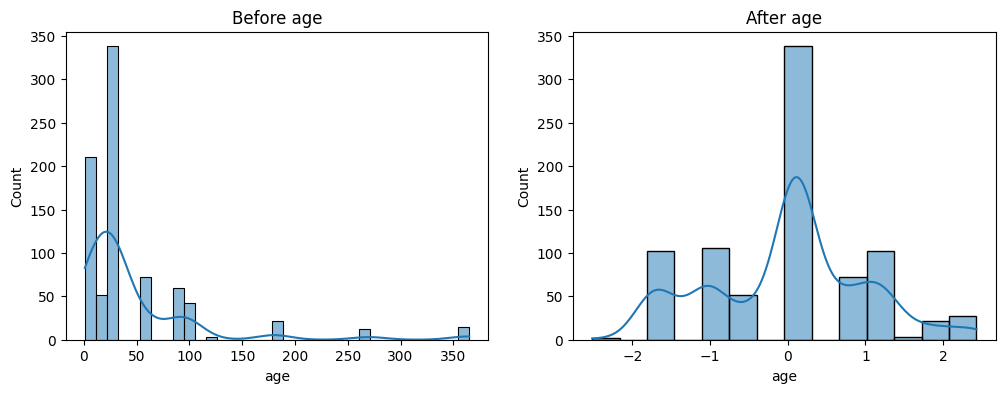

In [116]:
for col in x_train2.columns:
    fig , (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))
    
    sns.histplot(x_train[col], kde=True, ax=ax1)
    ax1.set_title(f"Before {col}")
    
    sns.histplot(x_train2[col], kde=True, ax=ax2)
    ax2.set_title(f"After {col}")
    
    plt.show()

In [117]:
x_train

,cement,blast_slag,fly_ash,water,superplasticizer,coarse_agg,fine_aggregate,age
337,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,56
384,516.0,0.0,0.0,162.0,8.2,801.0,802.0,28
805,393.0,0.0,0.0,192.0,0.0,940.0,758.0,90
682,183.9,122.6,0.0,203.5,0.0,959.2,800.0,28
329,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,3
...,...,...,...,...,...,...,...,...
802,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28
53,304.0,76.0,0.0,228.0,0.0,932.0,670.0,90
350,213.5,0.0,174.2,154.6,11.7,1052.3,775.5,14
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3


## Accuracy of Power Transformer (Yeo-Johnson)

In [118]:
pt1 = PowerTransformer()

x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2, y_train)

y_pred = lr.predict(x_test_transformed2)

print(r2_score(y_pred, y_test))

0.7686833610961478


In [119]:
pd.DataFrame({"cols":x_train.columns, "Yeo_Johnson_Lambdas":pt1.lambdas_})

,cols,Yeo_Johnson_Lambdas
0,cement,0.187580
1,blast_slag,0.001239
2,fly_ash,-0.149588
3,water,0.737146
4,superplasticizer,0.240118
5,coarse_agg,1.343976
6,fine_aggregate,1.930974
7,age,-0.002076


In [120]:
pd.DataFrame({"cols":x_train.columns,"Box-Cox_Lambdas":pt.lambdas_ , "Yeo_Johnson_Lambdas":pt1.lambdas_})

,cols,Box-Cox_Lambdas,Yeo_Johnson_Lambdas
0,cement,0.172271,0.187580
1,blast_slag,0.025273,0.001239
2,fly_ash,-0.032412,-0.149588
3,water,0.809568,0.737146
4,superplasticizer,0.099711,0.240118
5,coarse_agg,1.129168,1.343976
6,fine_aggregate,1.829625,1.930974
7,age,0.048975,-0.002076


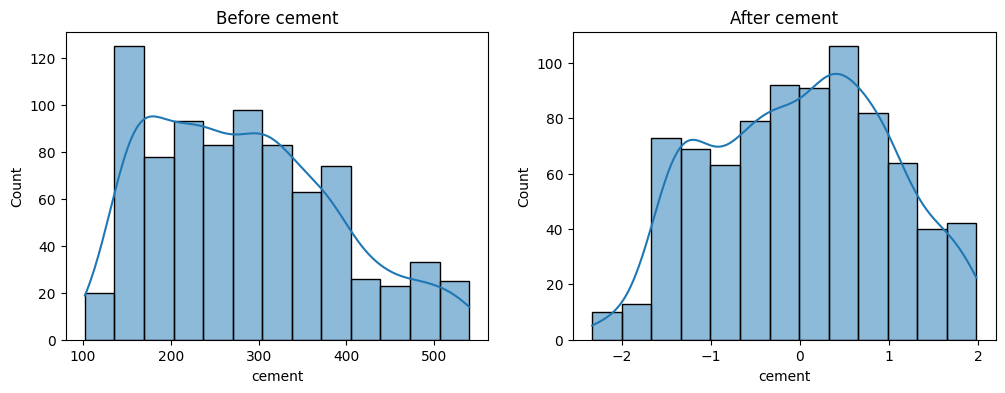

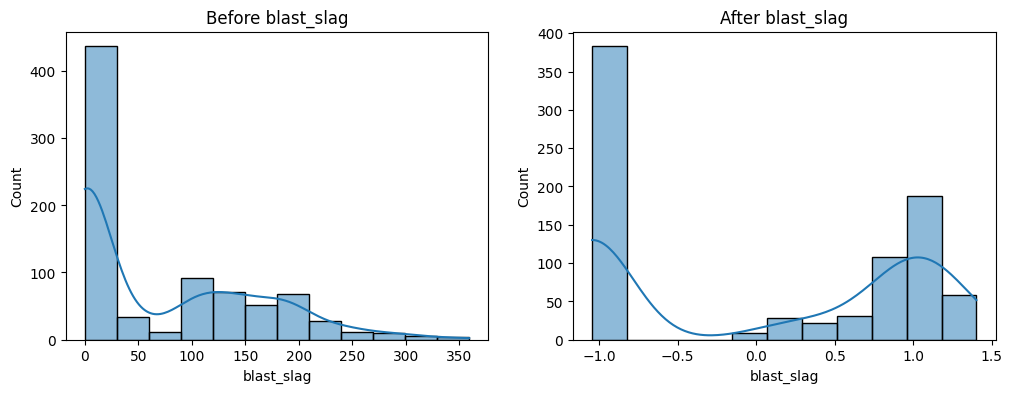

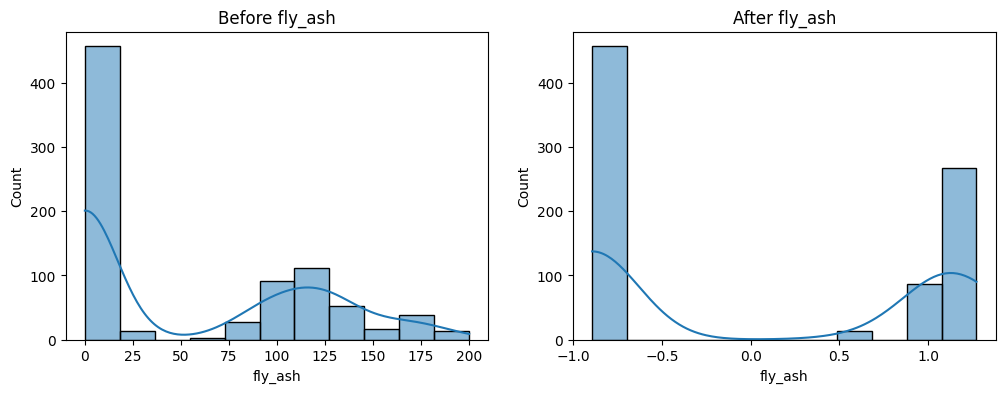

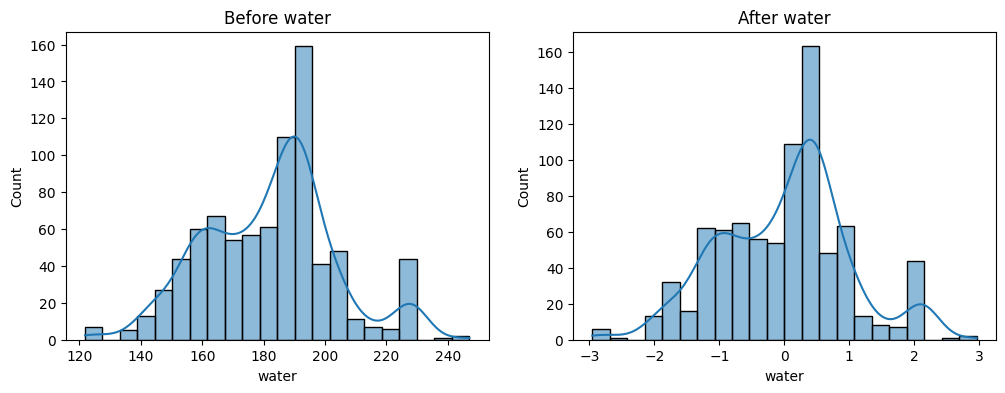

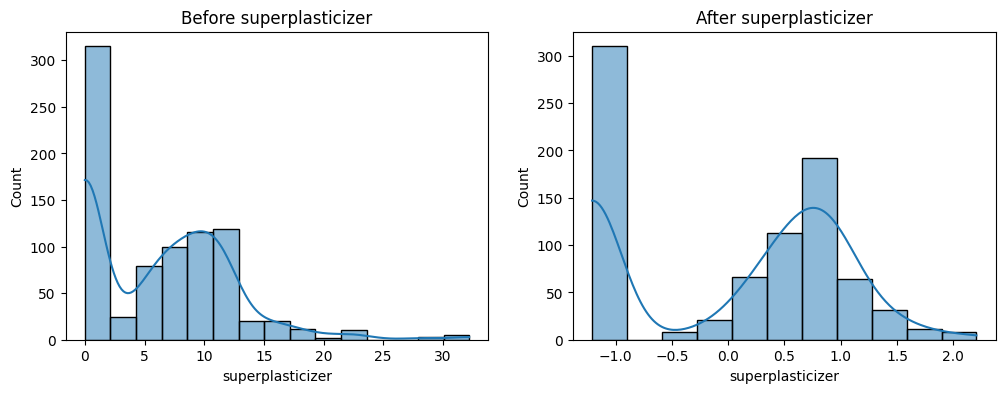

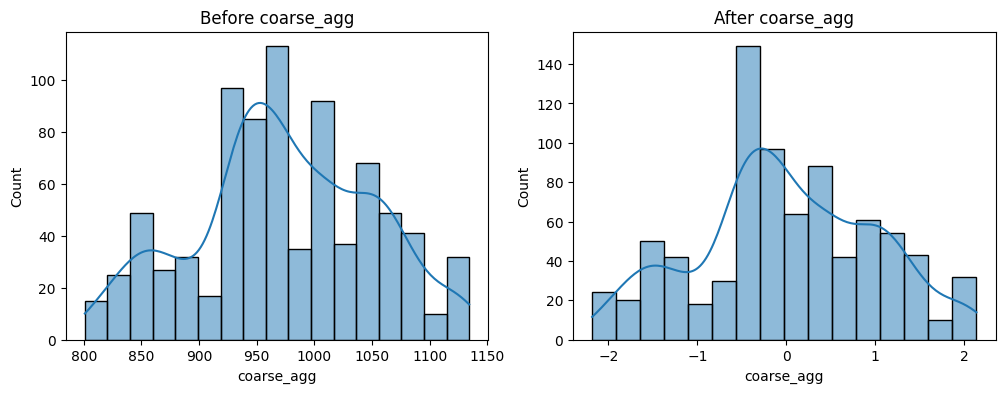

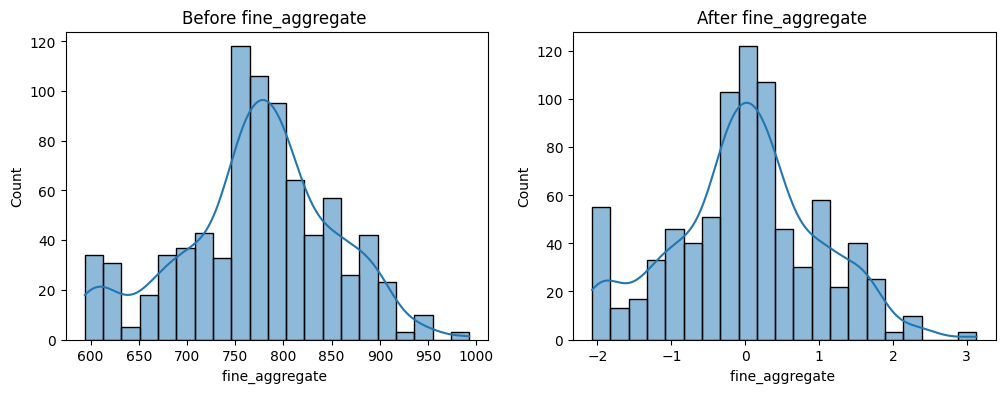

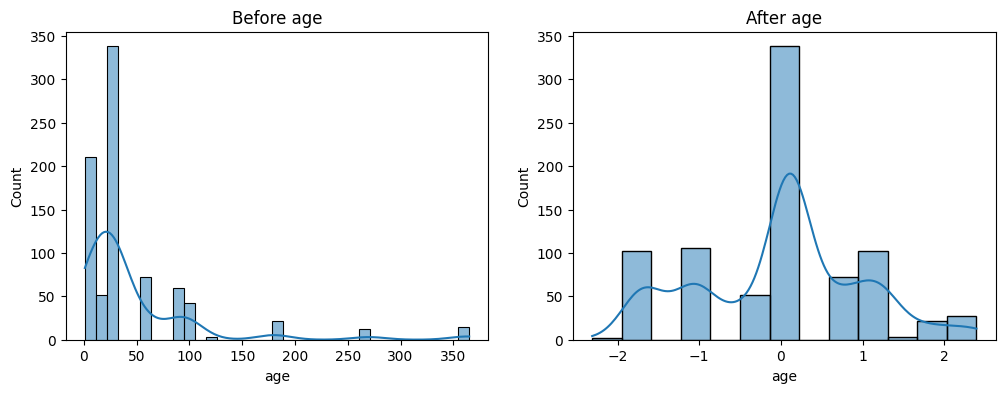

In [121]:
x_train_transformed2 = pd.DataFrame(x_train_transformed2, columns=x_train.columns)

for col in x_train2.columns:
    fig , (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))
    
    sns.histplot(x_train[col], kde=True, ax=ax1)
    ax1.set_title(f"Before {col}")
    
    sns.histplot(x_train_transformed2[col], kde=True, ax=ax2)
    ax2.set_title(f"After {col}")
    
    plt.show()